In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
from tqdm.notebook import tqdm

In [8]:
df_PER_gender = pd.read_csv(r'results/df_PER_gender.csv')

In [12]:
corpus_metadata = pd.read_csv(r'metadata/corpus_gendered.csv')

In [70]:
row = corpus_metadata.loc[corpus_metadata['titre']=='La-force-des-choses']

1963

In [76]:
def get_df_per_author_gender_date(df_metadata, df_PER_gender):
    list_PER = list(df_PER_gender.character)
    list_gender_PER = list(df_PER_gender.gender)
    list_titre = [elem.split('_')[1] for elem in list_PER]

    list_date = []
    list_gender_author = []
    
    for titre in tqdm(list_titre):
        if titre in list(df_metadata.titre):
            row_same_titre = df_metadata.loc[df_metadata['titre']==titre]
            list_date.append(int(row_same_titre['date'].values[0]))
            list_gender_author.append(row_same_titre['gender'].values[0])

    df_per_corpus = pd.DataFrame(zip(list_PER, list_gender_PER, list_date, list_gender_author), columns=['character', "gender_PER", 'date', 'gender_AUTHOR'])
    
    return df_per_corpus

In [77]:
df_per_corpus = get_df_per_author_gender_date(corpus_metadata, df_PER_gender)

  0%|          | 0/27586 [00:00<?, ?it/s]

In [79]:
df_per_corpus.to_csv(r'results/df_PER_gender_dated.csv', index = True)

In [80]:
df_per_corpus

,character,gender_PER,date,gender_AUTHOR
0,Glady-Alberic_Male-et-femelle_<Georges-839>,Female,1876,male
1,Glady-Alberic_Male-et-femelle_<Georges-912>,Female,1876,male
2,Glady-Alberic_Male-et-femelle_<une maîtresse-1...,Female,1876,male
3,Glady-Alberic_Male-et-femelle_<un tout petit b...,Male,1876,male
4,Glady-Alberic_Male-et-femelle_<Georges-417>,Female,1876,male
...,...,...,...,...
27523,Feval-Paul_Les-Compagnons-du-Silence_<Barbe Sp...,Female,1878,male
27524,Feval-Paul_Les-Compagnons-du-Silence_<Johann-3...,Male,1878,male
27525,Feval-Paul_Les-Compagnons-du-Silence_<La perso...,Male,1878,male
27526,Balzac-Honore-de_Jesus-Christ-en-Flandre_<!Une...,Female,1878,male


<AxesSubplot:xlabel='gender_PER', ylabel='count'>

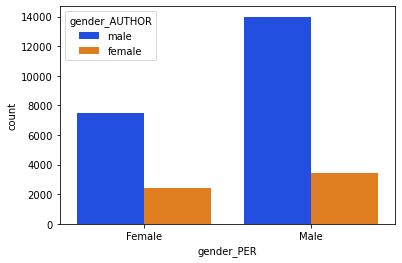

In [82]:
sns.countplot(x ='gender_PER', data = df_per_corpus, hue='gender_AUTHOR', palette = "bright")

### for each 5 annees, compute %female character

In [136]:
def gender_decades(list_dates, list_gender):
    list_decades, list_nbmale_decades,  list_nbfemale_decades, list_decades_vues, list_female_pourcentage = [], [], [], [], []
    conteur_male, conteur_female, i = 0, 0, 0
    for i in range(len(list_dates)):
        if list_dates[i] % 5 == 0 and len(list_decades_vues)>=1 and list_dates[i] not in list_decades_vues:#10==1
            list_decades.append(list_dates[i]-1)
            list_nbmale_decades.append(conteur_male)
            list_nbfemale_decades.append(conteur_female)
            list_decades_vues.append(list_dates[i])
            list_female_pourcentage.append(100*conteur_female/(conteur_female + conteur_male))
            conteur_female = 0
            conteur_male = 0

            
        if list_gender[i] == 'Female':
            conteur_female+=1
        else:
            conteur_male+=1
            
        if len(list_decades_vues) == 0:
            list_decades_vues.append(list_dates[i])
               
        
    return list_decades, list_female_pourcentage

In [127]:
def gender_year(list_dates, list_gender):
    list_year, list_nbmale_year,  list_nbfemale_year, list_year_vues, list_female_pourcentage = [], [], [], [], []
    conteur_male, conteur_female, i = 0, 0, 0
    for i in range(len(list_dates)):
        if list_dates[i] not in list_year_vues and len(list_year_vues)>=1:
            list_year_vues.append(list_dates[i])
            list_nbmale_year.append(conteur_male)
            list_nbfemale_year.append(conteur_female)
            list_female_pourcentage.append(100*conteur_female/(conteur_female + conteur_male))
            conteur_female = 0
            conteur_male = 0
        if list_gender[i] == 'Female':
            conteur_female+=1
        else:
            conteur_male+=1
        if len(list_year_vues) == 0:
            list_year_vues.append(list_dates[i])
            
        
    return list_year_vues, list_female_pourcentage

In [85]:
list(df_per_corpus.date)

,character,gender_PER,date,gender_AUTHOR
0,Glady-Alberic_Male-et-femelle_<Georges-839>,Female,1876,male
1,Glady-Alberic_Male-et-femelle_<Georges-912>,Female,1876,male
2,Glady-Alberic_Male-et-femelle_<une maîtresse-1...,Female,1876,male
3,Glady-Alberic_Male-et-femelle_<un tout petit b...,Male,1876,male
4,Glady-Alberic_Male-et-femelle_<Georges-417>,Female,1876,male
...,...,...,...,...
27523,Feval-Paul_Les-Compagnons-du-Silence_<Barbe Sp...,Female,1878,male
27524,Feval-Paul_Les-Compagnons-du-Silence_<Johann-3...,Male,1878,male
27525,Feval-Paul_Les-Compagnons-du-Silence_<La perso...,Male,1878,male
27526,Balzac-Honore-de_Jesus-Christ-en-Flandre_<!Une...,Female,1878,male


In [98]:
df_per_corpus_male = df_per_corpus[df_per_corpus['gender_AUTHOR']=='male']

In [99]:
df_per_corpus_female = df_per_corpus[df_per_corpus['gender_AUTHOR']=='female']

In [100]:
list_decades, list_nbmale_decades,  list_nbfemale_decades, list_female_pourcentage = gender_decades(list(df_per_corpus_male.date), list(df_per_corpus_male.gender_PER))

In [101]:
zipped = list(zip(list_decades, list_female_pourcentage))

In [102]:
df_gender_repartition = pd.DataFrame(zipped, columns=["decades", "female_rate"])

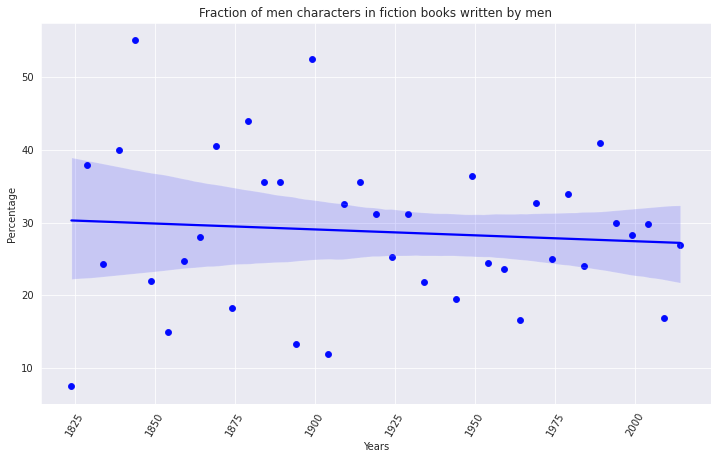

In [141]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(12, 7))
p1 = sns.scatterplot(data=df_gender_repartition, x='decades', y='female_rate', ax=ax)
p2 = sns.regplot(data=df_gender_repartition, x='decades', y='female_rate', ax=ax, color='blue')

plt.title('Fraction of men characters in fiction books written by men')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(rotation=60)

plt.show()

In [137]:
list_decades, list_female_pourcentage = gender_decades(list(df_per_corpus_female.date), list(df_per_corpus_female.gender_PER))

In [138]:
zipped = list(zip(list_decades, list_female_pourcentage))

In [139]:
df_gender_repartition_female = pd.DataFrame(zipped, columns=["decades", "female_rate"])

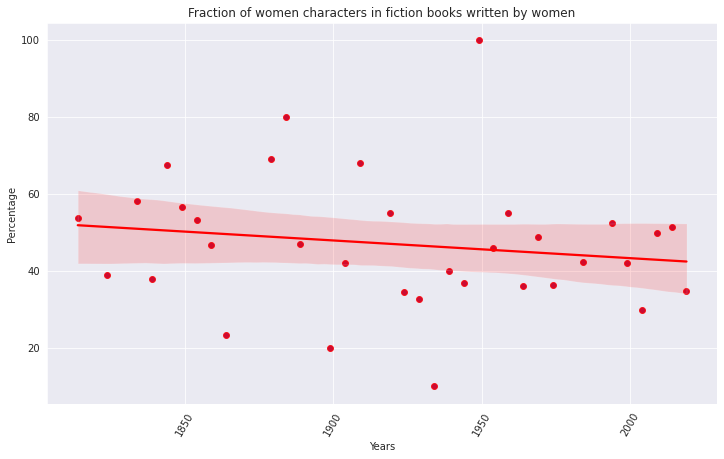

In [142]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(12, 7))
p1 = sns.scatterplot(data=df_gender_repartition_female, x='decades', y='female_rate', ax=ax)
p2 = sns.regplot(data=df_gender_repartition_female, x='decades', y='female_rate', ax=ax, color='red')

plt.title('Fraction of women characters in fiction books written by women')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(rotation=60)

plt.show()

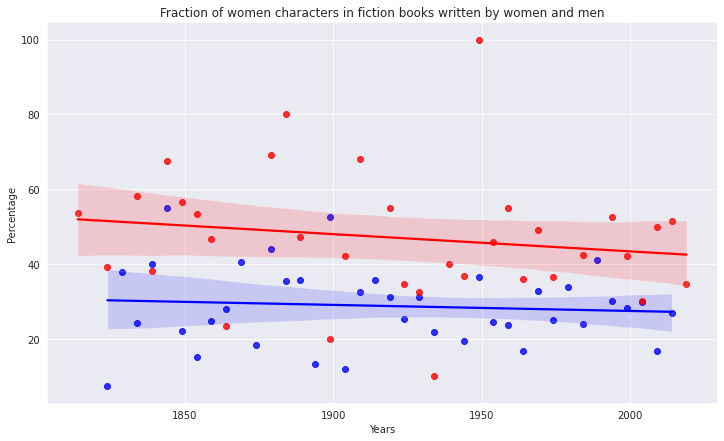

In [147]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(12, 7))
p1 = sns.regplot(data=df_gender_repartition, x='decades', y='female_rate', ax=ax, color='blue')
p2 = sns.regplot(data=df_gender_repartition_female, x='decades', y='female_rate', ax=ax, color='red')
plt.title('Percentage of women characters in fiction books written by women and men')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()